# Keras_imdb_binary_classification_example

## Import and prepare data

In [1]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = 5000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension = 5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Build and train NN

In [5]:
def build_model(number_of_hidden_layers):
    """builds the NN model with as many layers as defined in number_of_layers
    number_of_layers: int > 0"""
    model = tf.keras.models.Sequential()
    if number_of_hidden_layers < 1:
        print("Minimum number of hidden layers is 1. Number of hidden layers set to 1.")
        number_of_hidden_layers = 1
    model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape = (5000,)))
    for layer in range(number_of_hidden_layers - 1):
        model.add(tf.keras.layers.Dense(16, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    return model

In [6]:
max_number_of_hidden_layers = 5
models = [build_model(i) for i in range(1 ,max_number_of_hidden_layers + 1)]

In [7]:
num_epochs = 10
history = []
for model in models:
    history.append(model.fit(partial_x_train, 
                             partial_y_train, 
                             epochs = num_epochs, 
                             batch_size = 512, 
                             validation_data = (x_val, y_val), verbose = 0))

## Visualization

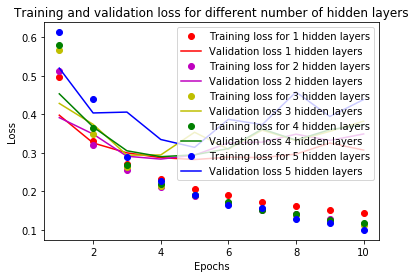

In [10]:
import matplotlib.pyplot as plt

history_dict_list = []
loss_values_list = []
val_loss_values_list = []
epochs = range(1, num_epochs + 1)
colors1 = ['ro', 'mo', 'yo', 'go', 'bo']
colors2 = ['r', 'm', 'y', 'g', 'b']

for index, h in enumerate(history):    
    history_dict_list.append(h.history)
    loss_values_list.append(history_dict_list[index]['loss'])
    val_loss_values_list.append(history_dict_list[index]['val_loss'])

    plt.plot(epochs, loss_values_list[index], colors1[index], label = 'Training loss for ' + str(index + 1) + ' hidden layers')
    plt.plot(epochs, val_loss_values_list[index], colors2[index], label = 'Validation loss ' + str(index + 1) + ' hidden layers')

plt.title('Training and validation loss for different number of hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

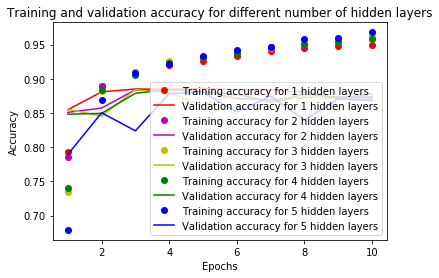

In [9]:
plt.clf()

acc_values_list = []
val_acc_values_list = []

for index, h in enumerate(history): 
    
    acc_values_list.append(history_dict_list[index]['acc'])
    val_acc_values_list.append(history_dict_list[index]['val_acc'])

    plt.plot(epochs, acc_values_list[index], colors1[index], label = 'Training accuracy for ' + str(index + 1) + ' hidden layers')
    plt.plot(epochs, val_acc_values_list[index], colors2[index], label = 'Validation accuracy for ' + str(index + 1) + ' hidden layers')

    plt.title('Training and validation accuracy for different number of hidden layers')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()